In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Intro

From kaggle, someone posted a collection of tweets from accounts that are following ISIS. 

This project was focused on the visualization aspect to determine whether or not those who are tweeting at large have large audiences, or like me, have few followers. Looking at the number of the tweets they've put out as well and the followers they've accrued it will be possible to see how broad of an audience the ISIS followers are reaching.

<a id='eda'></a>
# Early Data Analysis

In [2]:
tweets = pd.read_csv('tweets.csv')

In [3]:
tweets.head(2)

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...


For the analysis that's needed it's not exactly needed to maintain all of the information present. Although it would be interesting to create a network of the users, it would be more interesting to see who are the most common tweeters and then take a look at what the common bigrams for the most frequent tweeters are versus those who are not. 

It will also be interesting to see if spikes of tweets occur following terrorist attacks. Should that turn to be true, then it will be interesting which attacks garnered the most activity. 

Finally the majority of the tweets do not have an associated location. However the time is still present so based on the activity of the user their timezone can be infered.

In [4]:
user_count = tweets.name.value_counts()
user_count = pd.DataFrame(user_count)
user_count.describe()

,name
count,112.000000
mean,155.446429
std,234.948138
min,4.000000
25%,39.750000
50%,96.000000
75%,153.750000
max,1475.000000


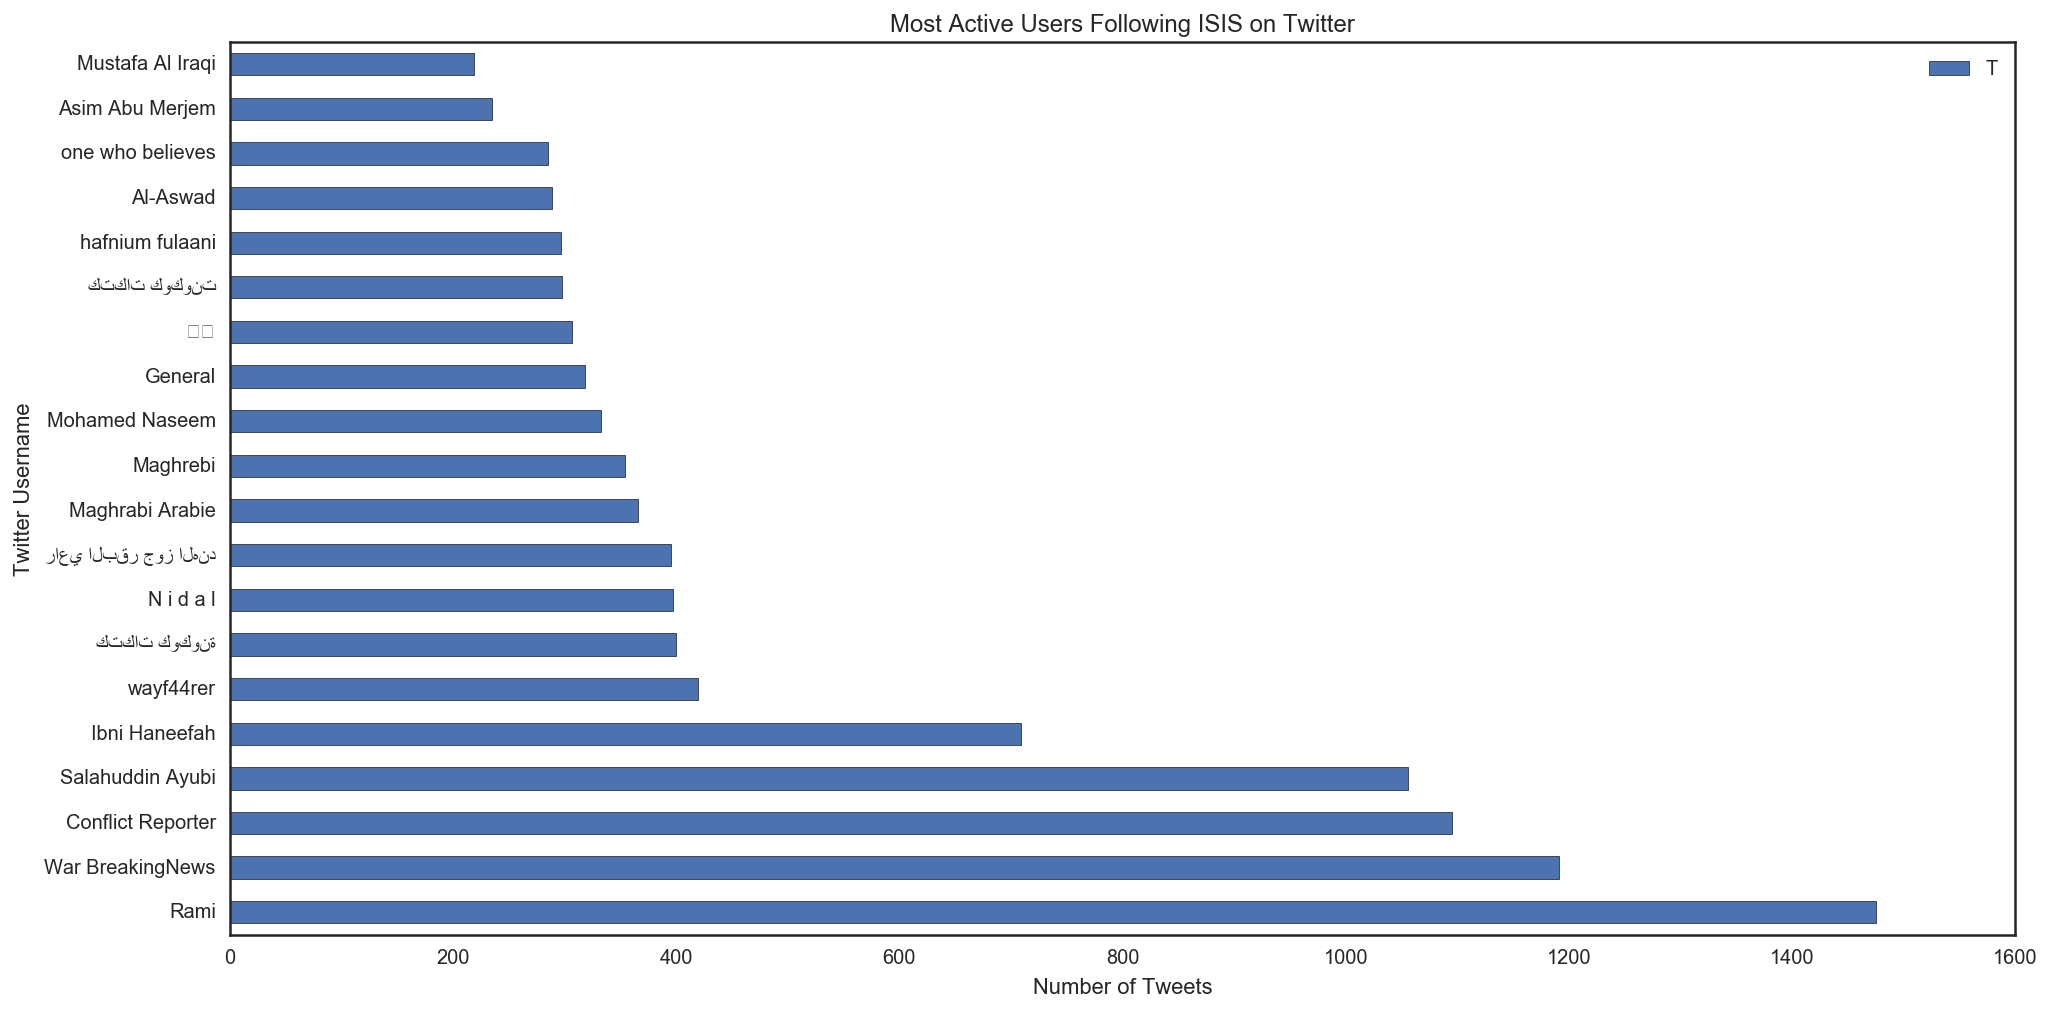

In [5]:
user_count[user_count['name'] > 154][0:20].plot(kind='barh', figsize=(16,8))
plt.legend('Tweets', loc=0)
plt.title('Most Active Users Following ISIS on Twitter')
plt.xlabel('Number of Tweets')
plt.ylabel('Twitter Username')
plt.show()

Looking at the English names above, since I can't read Arabic, none of the names are inheirently indicitive of sympathy towards ISIS, save perhaps for Rami which translates to *one who believes*. This is only by volume of tweets. It could be that Rami has few to no followers and is just retweeting what he sees. Will look at the accounts with the most followers as well, and finally a metric of the number of followers that the account has relative to the followers they have. 

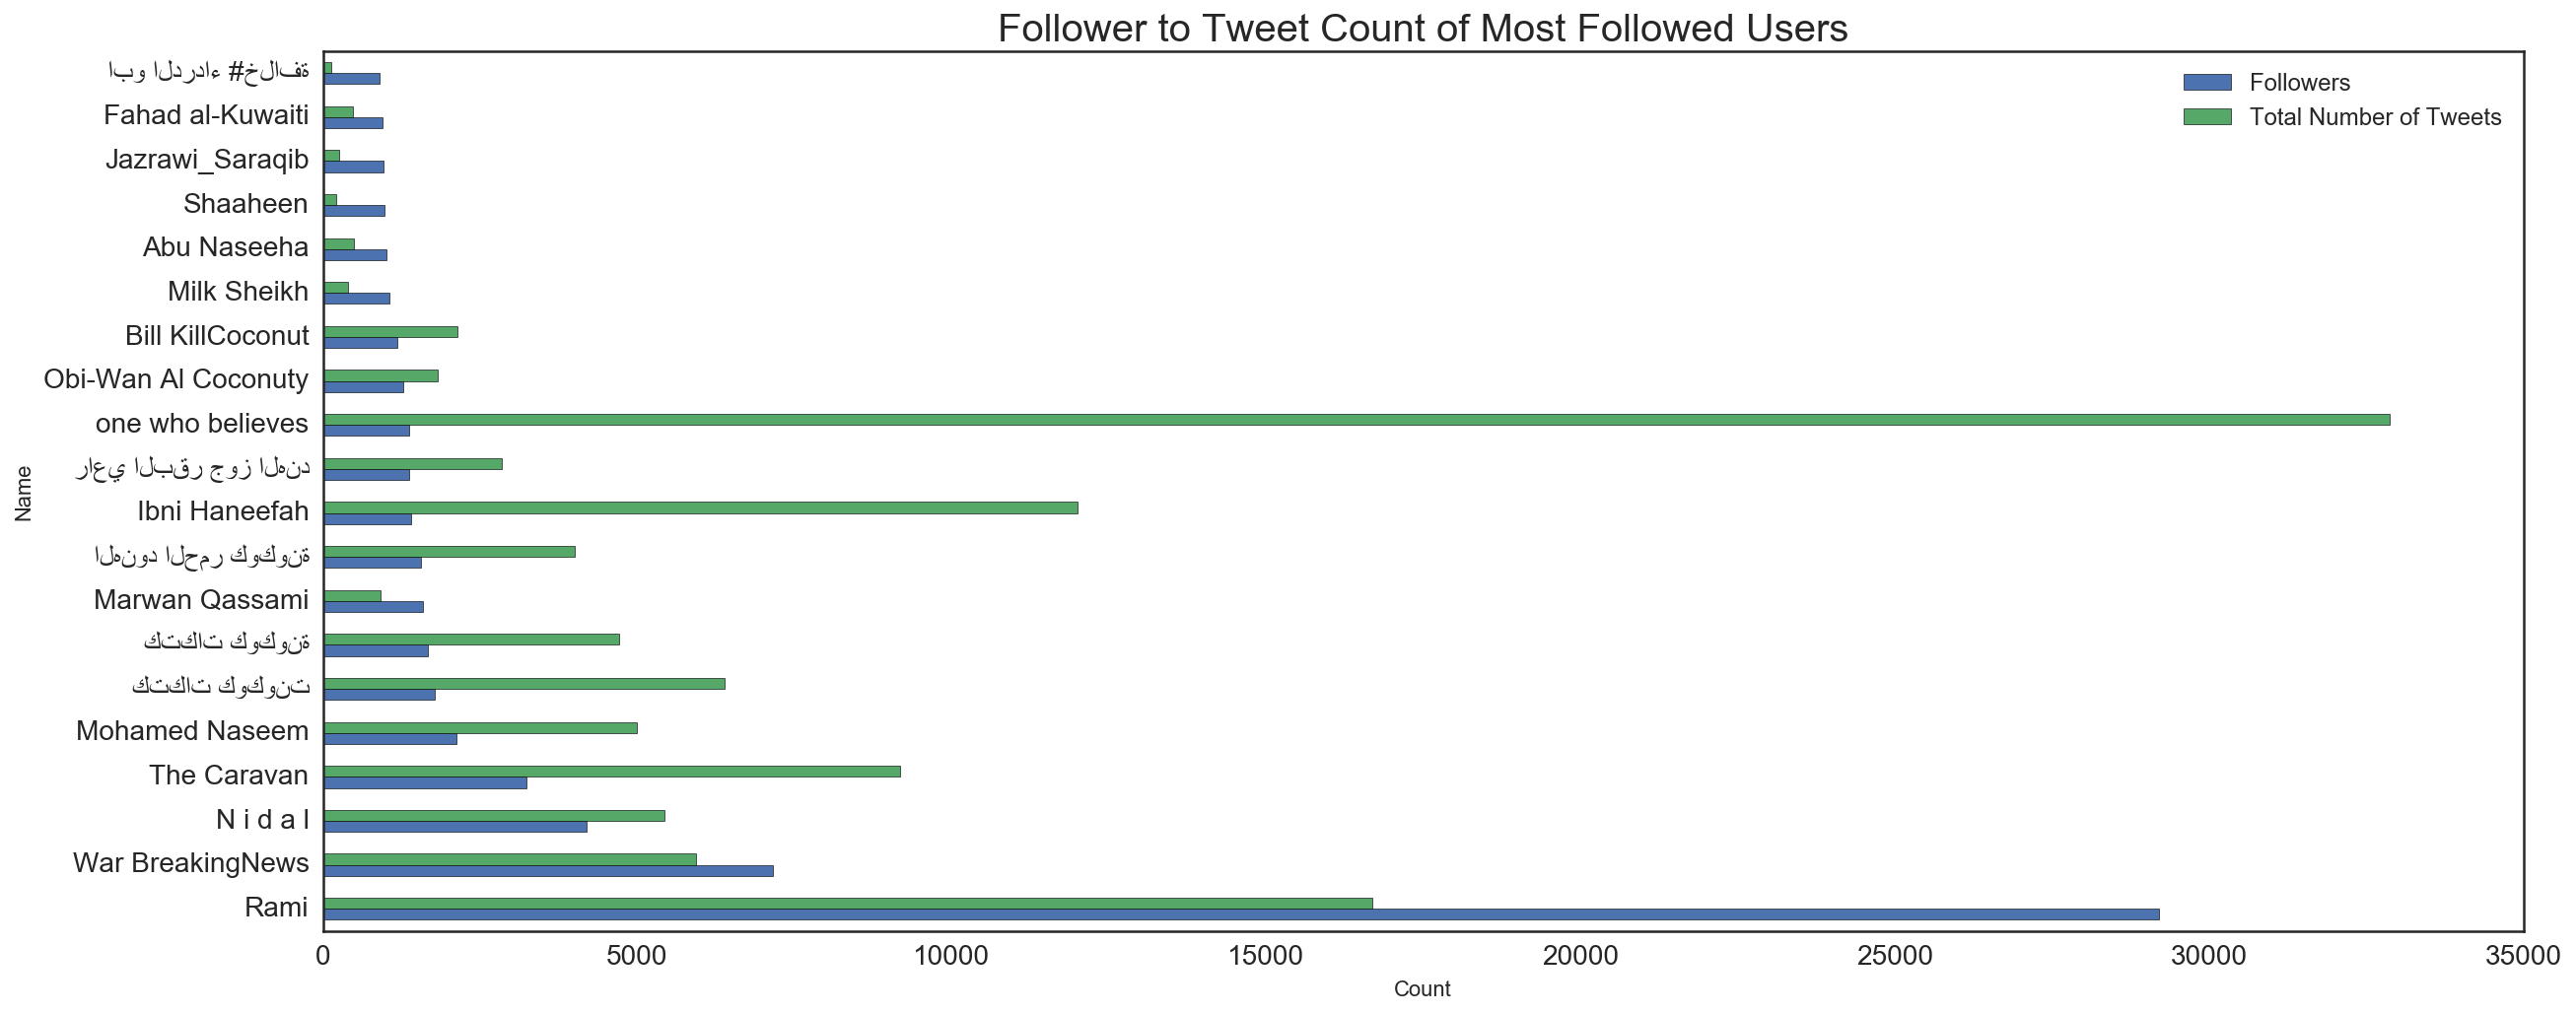

In [6]:
popular = tweets.drop_duplicates(subset=['name']).sort_values(by='followers', ascending=False)[0:20]

popular.plot(kind='barh', figsize=(20,8), use_index=True, x='name', fontsize=14)
plt.title("Follower to Tweet Count of Most Followed Users", fontsize=20)
plt.legend(["Followers", "Total Number of Tweets"], fontsize=12)
plt.xlabel("Count")
plt.ylabel("Name")

plt.show()

In [7]:
tweets['time'] = pd.to_datetime(tweets.time)

In [8]:
tweets['day'] = tweets['time'].map(lambda x: x.strftime('%Y-%m-%d'))

In [9]:
tweets.dtypes

name                      object
username                  object
description               object
location                  object
followers                  int64
numberstatuses             int64
time              datetime64[ns]
tweets                    object
day                       object
dtype: object

In [10]:
days = pd.DataFrame(tweets.day.value_counts())
days = days.sort_index()
days['Tweets'] = days['day']
del days['day']

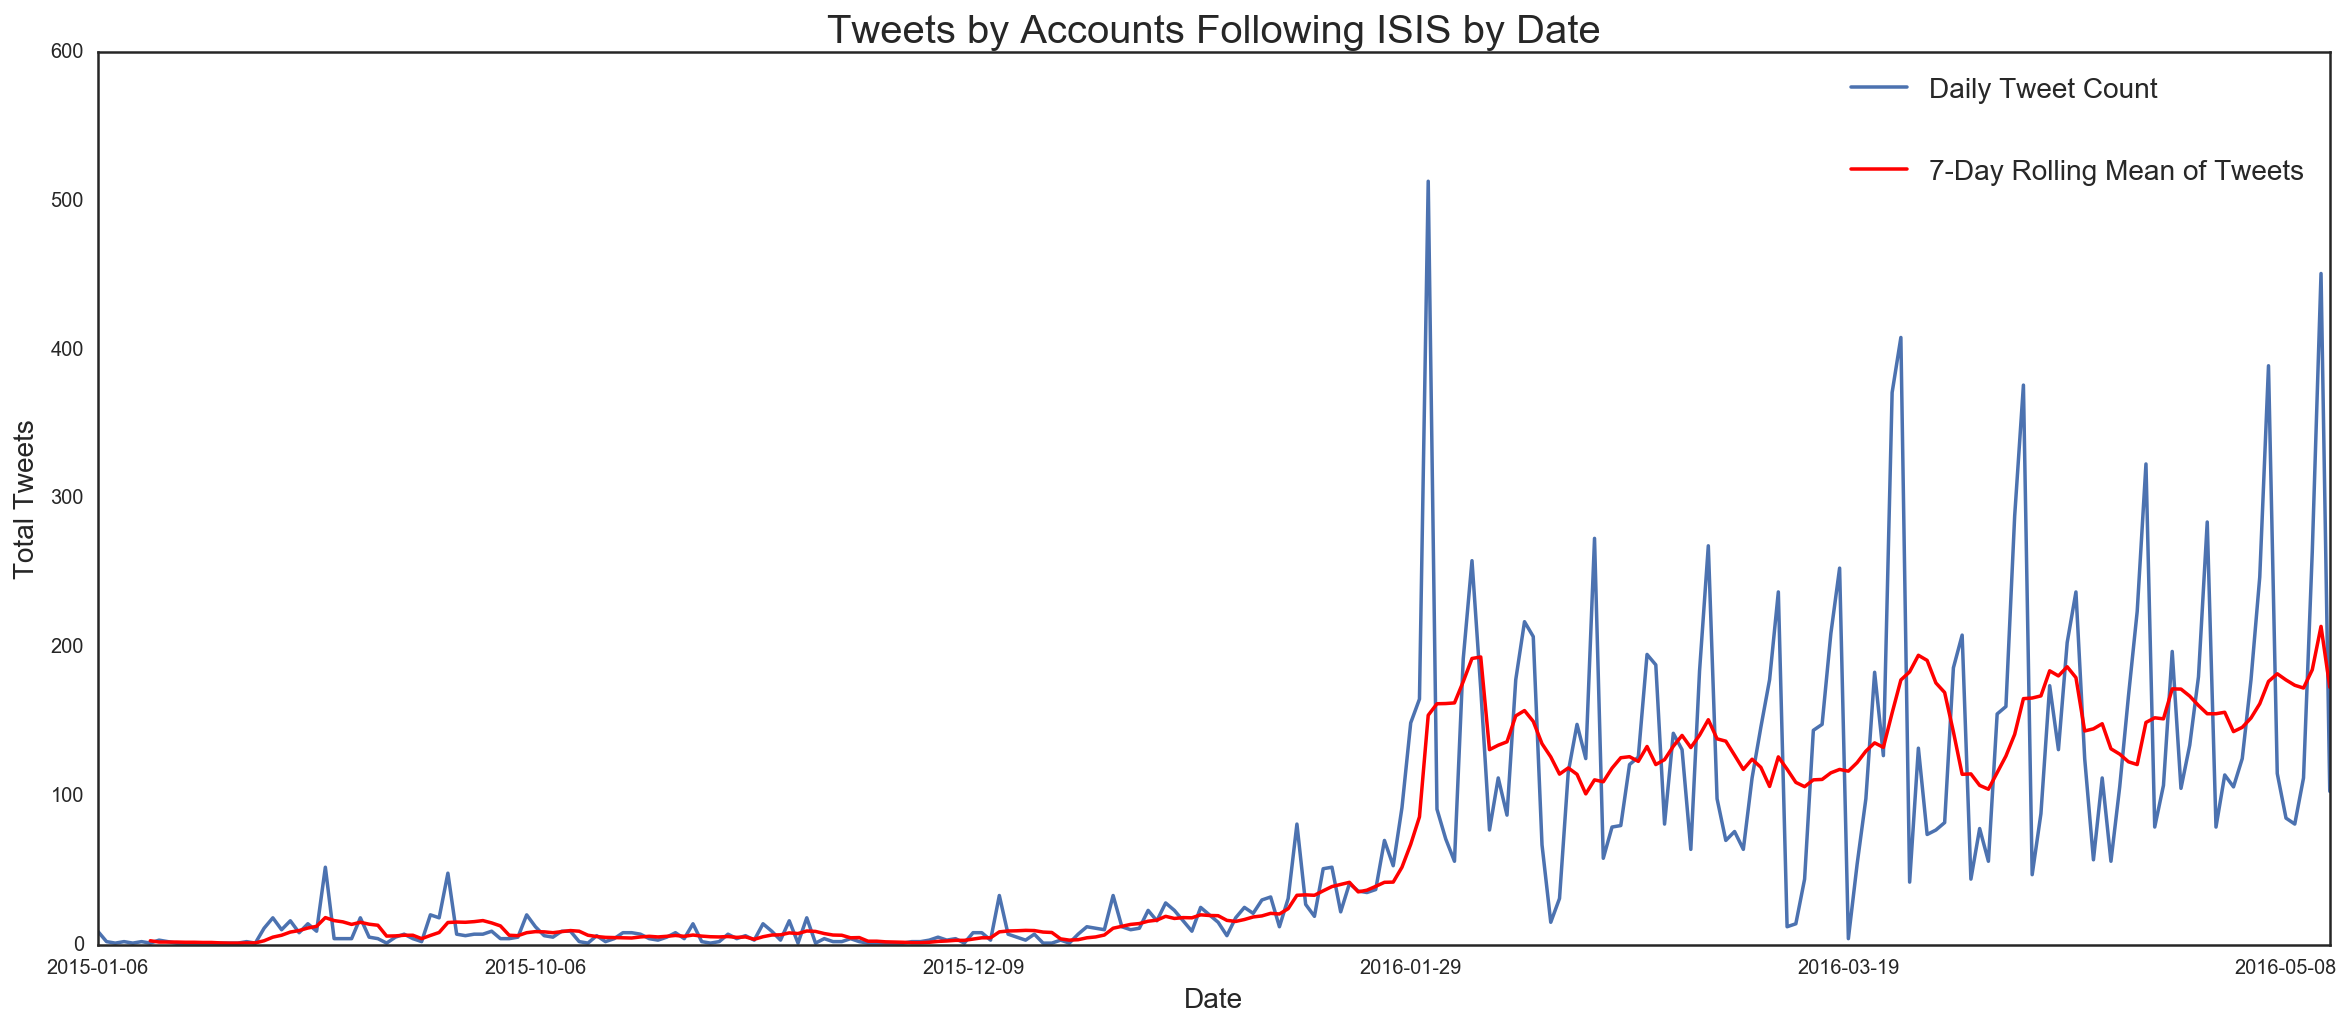

In [11]:
fig, ax = plt.subplots(figsize = (20,8))
days.plot(kind='line', ax=ax)
days.rolling(center=False, window=7).mean().plot(color ='r', ax=ax)

ax.legend(['Daily Tweet Count', '7-Day Rolling Mean of Tweets'], loc = 'upper right',
           numpoints = 1, labelspacing = 2.0, fontsize = 14)



plt.title('Tweets by Accounts Following ISIS by Date', fontsize=20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Tweets', fontsize = 14)
plt.show()

There are several peaks that appears to occur after January 29th. With a peak around January 31st. To determine what dates were above the baseline, the date was cut off after January 29th. Through looking at the description of the 

In [12]:
(days.ix['2016-01-29' :]).describe()

,Tweets
count,106.00000
mean,147.45283
std,96.10888
min,4.00000
25%,79.00000
50%,125.00000
75%,187.50000
max,513.00000


In [13]:
days[days['Tweets'] >= 187].sort_values('Tweets', ascending=False).head()

,Tweets
2016-01-31,513
2016-05-12,451
2016-03-25,408
2016-05-06,389
2016-04-08,376


All of these days had rather horrific and cowardly terrorist attacks. January 31st was marked by an attack in Syria, the Sayyidah Zaynab bombings, that left more than 60 people dead and over 100 severely wounded. May 12th saw the Zara'a massacre in Syria, with the Alawites suffering at least 49 deaths (42 civilian, 7 military). It was surprising not to see anything following the Brussels attack. As it stands all of these are visible as major peaks following the event and is visible in the above graph. 

For the majority of these twitter users, they seem to be nothing more than tin soldiers. People who are tweeting often to a small number of users. As ISIS continues to be driven back there will likely be more tweets to continue to grow the narrative of the organization. 